In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
from skimage import io
import matplotlib.image as mpimg
from PIL import Image
import time

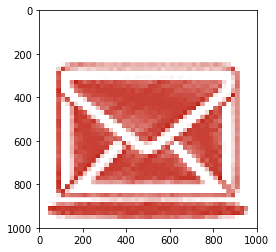

In [39]:
imgs = io.imread('C:/Users/lenovo/Desktop/yapayZeka/12.jpg')
imgplot = plt.imshow(imgs)

In [40]:
img = Image.open('C:/Users/lenovo/Desktop/yapayZeka/12.jpg').convert('RGB')
pix_val = list(img.getdata())

In [41]:
dizi = list()
for r,g,b in pix_val:
    if r == 0:
        r = 1
    else:
        r = 255 - r  
    dizi.append(r)

In [42]:
grid = np.zeros((1000,1000))

In [43]:
count = 0
while(count<1000000):
    for i in range(0,1000):
        for j in range(0,1000):
            grid[i][j] = dizi[count]
            count += 1 

In [44]:
baslangıc_zaman=time.time()
class Node():
    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position


def bestFirstSearch(maze, start, end):

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] # Return reversed path

        # Generate children
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)
            
if __name__ == '__main__':
    start = (0, 0)
    end = (999, 999)
    path = bestFirstSearch(grid, start, end)
    print(path)
    bitis_zaman=time.time()
    print("Searching-Time : ",  bitis_zaman-baslangıc_zaman)

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (12, 12), (13, 13), (14, 14), (15, 15), (16, 16), (17, 17), (18, 18), (19, 19), (20, 20), (21, 21), (22, 22), (23, 23), (24, 24), (25, 25), (26, 26), (27, 27), (28, 28), (29, 29), (30, 30), (31, 31), (32, 32), (33, 33), (34, 34), (35, 35), (36, 36), (37, 37), (38, 38), (39, 39), (40, 40), (41, 41), (42, 42), (43, 43), (44, 44), (45, 45), (46, 46), (47, 47), (48, 48), (49, 49), (50, 50), (51, 51), (52, 52), (53, 53), (54, 54), (55, 55), (56, 56), (57, 57), (58, 58), (59, 59), (60, 60), (61, 61), (62, 62), (63, 63), (64, 64), (65, 65), (66, 66), (67, 67), (68, 68), (69, 69), (70, 70), (71, 71), (72, 72), (73, 73), (74, 74), (75, 75), (76, 76), (77, 77), (78, 78), (79, 79), (80, 80), (81, 81), (82, 82), (83, 83), (84, 84), (85, 85), (86, 86), (87, 87), (88, 88), (89, 89), (90, 90), (91, 91), (92, 92), (93, 93), (94, 94), (95, 95), (96, 96), (97, 97), (98, 98), (99, 99), (100, 100), (101, 1

In [45]:
print(len(path))

1661


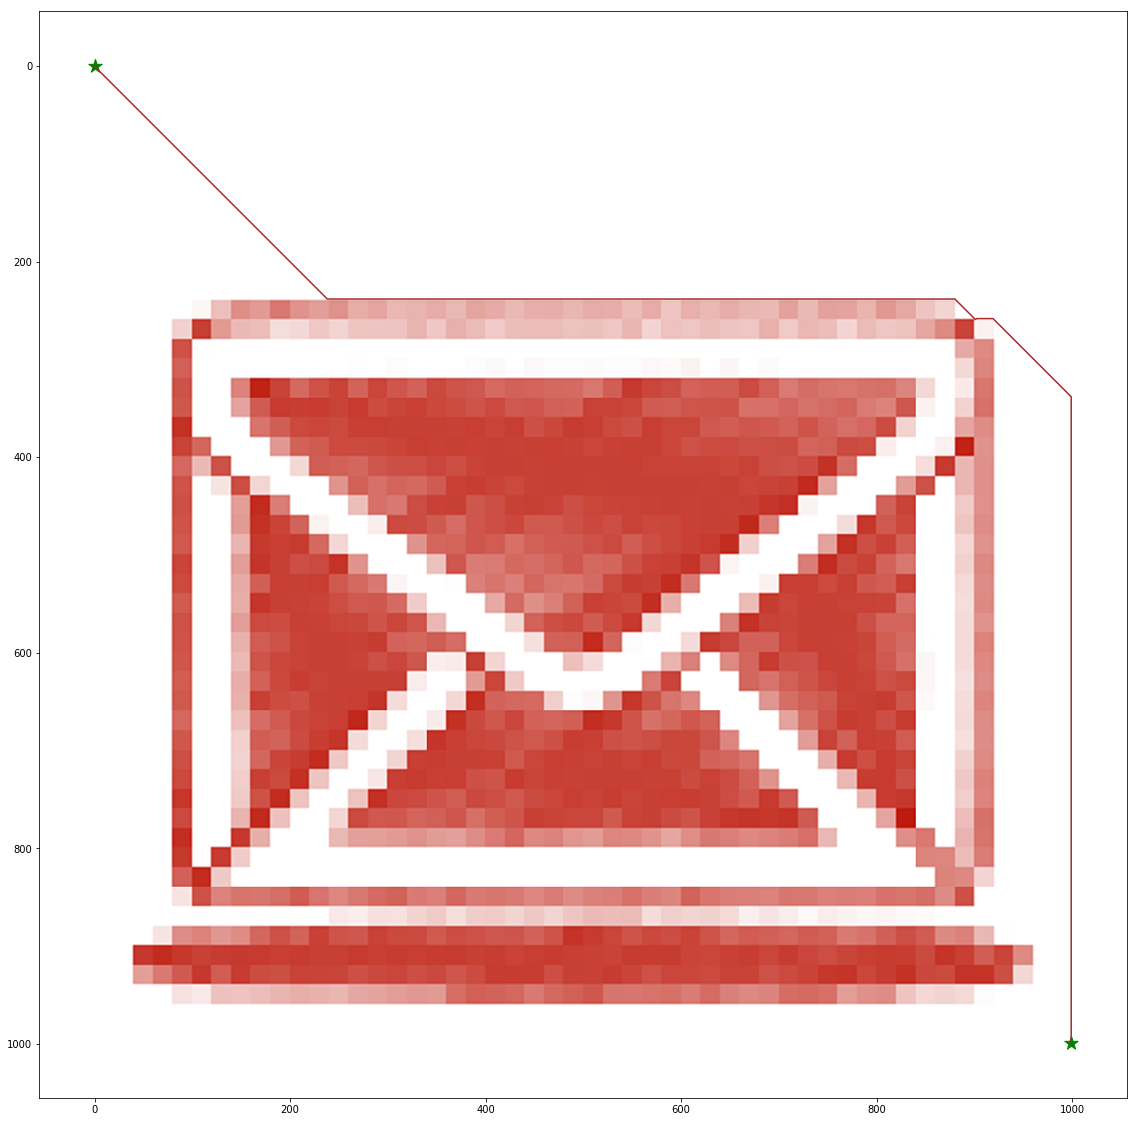

In [46]:
# plot the path
x_coords = []
y_coords = []
for i in (range(0,len(path))):
    x = path[i][0]
    y = path[i][1]
    x_coords.append(x)
    y_coords.append(y)
    
# plot map and path
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(imgs, cmap=plt.cm.Dark2)
ax.scatter(start[1],start[0], marker = "*", color = "green", s = 200)
ax.scatter(end[1],end[0], marker = "*", color = "green", s = 200)
ax.plot(y_coords,x_coords, color = "brown")
plt.show()